In [ ]:
#%%

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from functions import load_datasets, VectorizerWrapper, analyze_model, meta_grid_search, write_to_file, print_scores
from sklearn.model_selection import GridSearchCV

import copy

In [ ]:
# %%

vectorizer_name = "count"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)
model = MultinomialNB(alpha=0.9)

train_data, val_data, test_data = load_datasets(vectorizer_name=vectorizer_name)
train_labels = train_data['label']
val_labels = val_data['label']
test_labels = test_data['label']

max_features_ls, max_df_ls = [1000, 5000, 7000, 12000, 20000, 30000], [0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9]
print(vectorizer_name + ", max_features:" + str(max_features_ls) + ", max_df:" + str(max_df_ls))

highest_score = 0
best_features = {}
results_ls = []
for max_features in max_features_ls:
    for max_df in max_df_ls: 
        vect_tmp = copy.deepcopy(vectorizer)
        model_tmp = copy.deepcopy(model)

        print("fitting a model for: max_features: {} max_df: {}".format(max_features, max_df))

        X_train = vect_tmp.fit_transform(train_data['tweet'], max_features=max_features, max_df=max_df)
        X_val = vect_tmp.transform(val_data['tweet'])
        X_test = vect_tmp.transform(test_data['tweet'])
        model_tmp.fit(X_train, train_data['label'])

        train_pred = model_tmp.predict(X_train)
        print_scores(s="train", y_true=train_labels, y_pred=train_pred)

        results = analyze_model(model=model_tmp, X_val=X_val, val_labels=val_labels, X_test=X_test, test_labels=test_labels, plot_conf_mats=False)
        cur_score = results.get("val_f1")
        if cur_score > highest_score:
            highest_score = cur_score
            best_features = {'max_features': max_features, 'max_df': max_df}
        results_ls.append([max_features, max_df, results])

count, max_features:[1000, 5000, 7000, 12000, 20000, 30000], max_df:[0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9]
fitting a model for: max_features: 1000 max_df: 0.05
Printing results for the model for train
train F1: 0.6204
train Accuracy: 0.6230
train Recall: 0.6230
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.6116
Validation Accuracy: 0.6135
Validation Recall: 0.6135
Test F1: 0.5186
Test Accuracy: 0.5278
Validation Recall: 0.5278
fitting a model for: max_features: 1000 max_df: 0.1
Printing results for the model for train
train F1: 0.6218
train Accuracy: 0.6236
train Recall: 0.6236
Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.6041
Validation Accuracy: 0.6055
Validation Recall: 0.6055
Test F1: 0.5275
Test Accuracy: 0.5339
Validation Recall: 0.5339
fitting a model for: max_features: 1000 max_df: 0.2
Printing results for the model for train
train F1: 0.6200
train Accuracy: 0.6213
train Recall: 0.6213
Analyzing the model:
0 = negati

In [ ]:
#%%

print(highest_score)
print(best_features)

for result in results_ls:
    print(result)

0.630498884173135
{'max_features': 7000, 'max_df': 0.2}
[1000, 0.05, {'test_accuracy': 0.5277596873982416, 'test_f1': 0.518570056795136, 'test_recall': 0.5277596873982416, 'val_accuracy': 0.6135, 'val_f1': 0.6115959350213546, 'val_recall': 0.6135}]
[1000, 0.1, {'test_accuracy': 0.5339465971996092, 'test_f1': 0.5275093954714883, 'test_recall': 0.5339465971996092, 'val_accuracy': 0.6055, 'val_f1': 0.6041470538329842, 'val_recall': 0.6055}]
[1000, 0.2, {'test_accuracy': 0.536470205144904, 'test_f1': 0.5296099372107789, 'test_recall': 0.536470205144904, 'val_accuracy': 0.601, 'val_f1': 0.5996145482140275, 'val_recall': 0.601}]
[1000, 0.3, {'test_accuracy': 0.536470205144904, 'test_f1': 0.5296099372107789, 'test_recall': 0.536470205144904, 'val_accuracy': 0.601, 'val_f1': 0.5996145482140275, 'val_recall': 0.601}]
[1000, 0.5, {'test_accuracy': 0.536470205144904, 'test_f1': 0.5296099372107789, 'test_recall': 0.536470205144904, 'val_accuracy': 0.601, 'val_f1': 0.5996145482140275, 'val_recall':

#%% [markdown]

## Fitting the final Multinomial model 7000 model with max_df=0.2

In [ ]:
#%%

vectorizer_name = "count"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)

train_data, val_data, test_data = load_datasets(vectorizer_name=vectorizer_name)

X_train = vectorizer.fit_transform(train_data['tweet'], max_features=7000, max_df=0.2)

# Transform the validation and test data
X_val = vectorizer.transform(val_data['tweet'])
X_test = vectorizer.transform(test_data['tweet'])
train_labels = train_data['label']
val_labels = val_data['label']
test_labels = test_data['label']

In [ ]:
#%%

# Create and train the final Naive Bayes model
model = MultinomialNB(alpha=0.9)
model.fit(X_train, train_data['label'])

MultinomialNB(alpha=0.9)

Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.6305
Validation Accuracy: 0.6310
Validation Recall: 0.6310
Confusion matrix, without normalization- for val data
[[176  78  58]
 [129 495 245]
 [ 52 176 591]]
Normalized confusion matrix- for val data
[[0.56410256 0.25       0.18589744]
 [0.14844649 0.56962025 0.28193326]
 [0.06349206 0.21489621 0.72161172]]


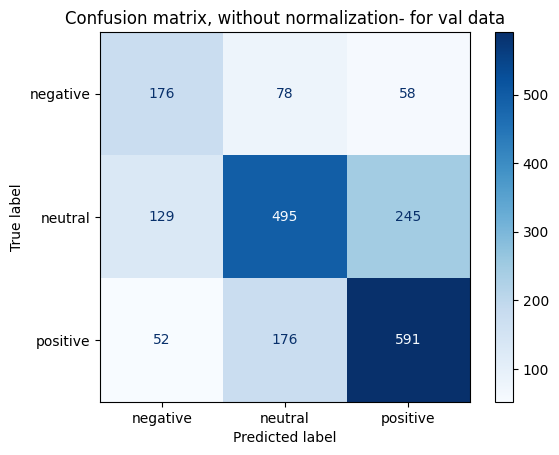

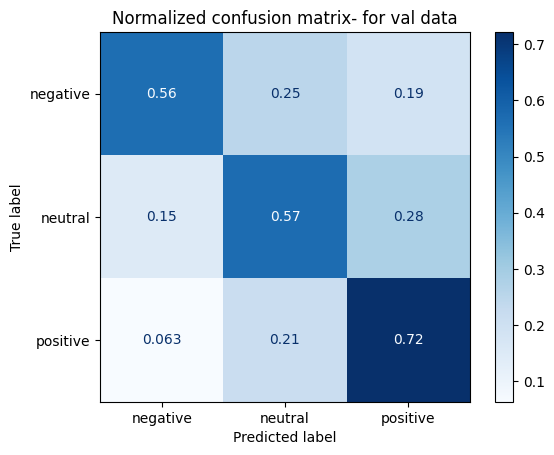

Test F1: 0.5753
Test Accuracy: 0.5743
Validation Recall: 0.5743
Confusion matrix, without normalization- for test data
[[2399 1206  367]
 [1583 3246 1108]
 [ 239  726 1410]]
Normalized confusion matrix- for test data
[[0.60397784 0.30362538 0.09239678]
 [0.26663298 0.54674078 0.18662624]
 [0.10063158 0.30568421 0.59368421]]


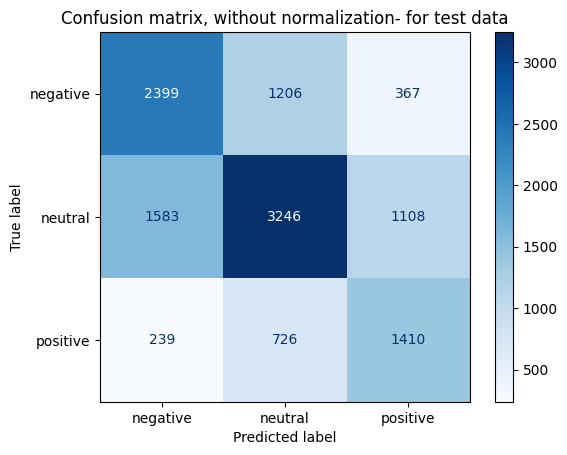

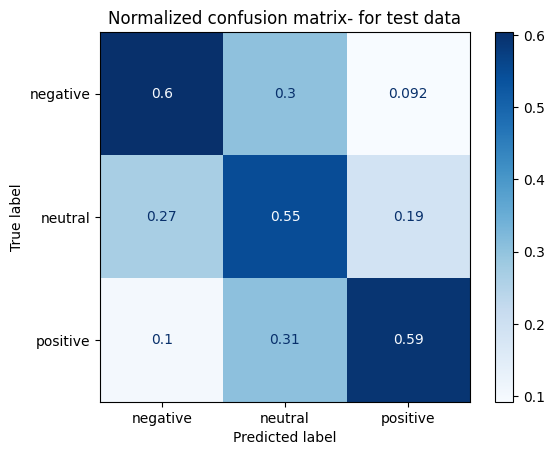

{'test_accuracy': 0.5743243243243243, 'test_f1': 0.5753041135168417, 'test_recall': 0.5743243243243243, 'val_accuracy': 0.631, 'val_f1': 0.630498884173135, 'val_recall': 0.631}


In [ ]:
#%%

# Analyze the model 
results = analyze_model(model=model, X_val=X_val, val_labels=val_labels, X_test=X_test, test_labels=test_labels, plot_conf_mats=True)

print(results)

#%% [markdown]

## Fitting the final Gaussian model for word2vec and var_smoothing 1e-10

In [ ]:
#%%

vectorizer_name = "word2vec"
vectorizer = VectorizerWrapper(vectorizer_name=vectorizer_name)

train_data, val_data, test_data = load_datasets(vectorizer_name=vectorizer_name)

X_train = vectorizer.fit_transform(train_data['tweet'])

# Transform the validation and test data
X_val = vectorizer.transform(val_data['tweet'])
X_test = vectorizer.transform(test_data['tweet'])
train_labels = train_data['label']
val_labels = val_data['label']
test_labels = test_data['label']

using word2vec
using word2vec
using word2vec


In [ ]:
#%%

# Create and train the final Naive Bayes model
model = GaussianNB(var_smoothing= 1e-10)
model.fit(X_train, train_data['label'])

GaussianNB(var_smoothing=1e-10)

Analyzing the model:
0 = negative, 1= neutral, 2=positive
Validation F1: 0.4162
Validation Accuracy: 0.4045
Validation Recall: 0.4045
Confusion matrix, without normalization- for val data
[[ 93 111 108]
 [236 338 295]
 [198 243 378]]
Normalized confusion matrix- for val data
[[0.29807692 0.35576923 0.34615385]
 [0.27157652 0.38895282 0.33947066]
 [0.24175824 0.2967033  0.46153846]]


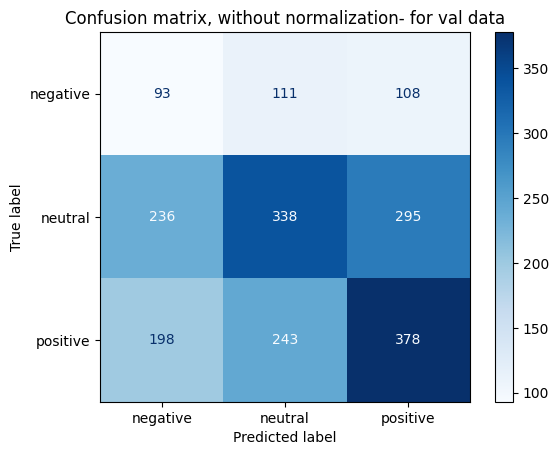

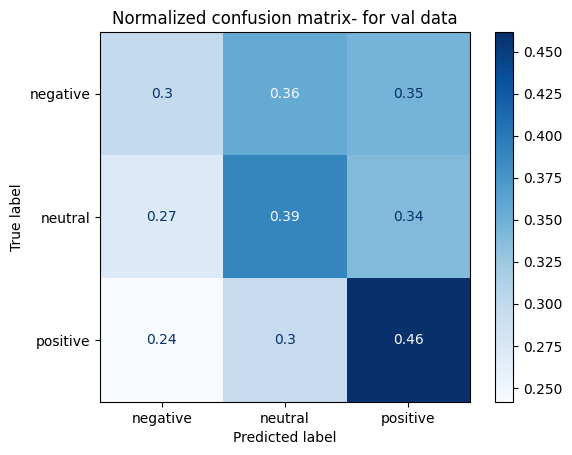

Test F1: 0.4141
Test Accuracy: 0.4477
Validation Recall: 0.4477
Confusion matrix, without normalization- for test data
[[ 763 2550  659]
 [ 766 4246  925]
 [ 249 1635  491]]
Normalized confusion matrix- for test data
[[0.19209466 0.64199396 0.16591138]
 [0.12902139 0.71517601 0.15580259]
 [0.10484211 0.68842105 0.20673684]]


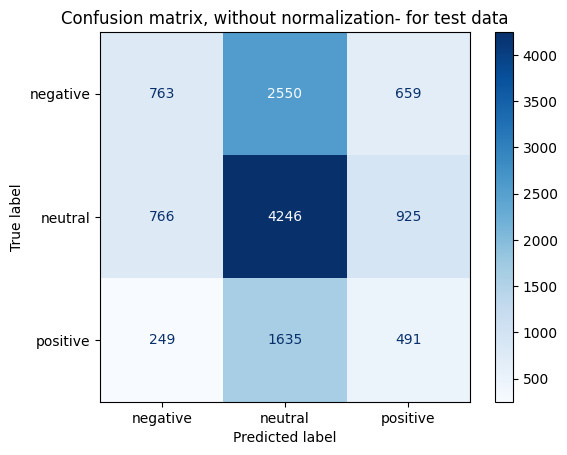

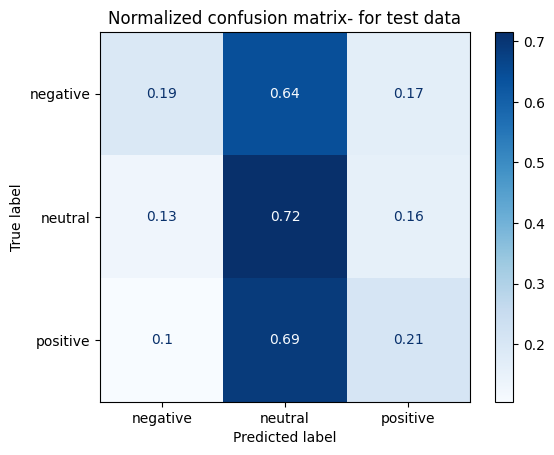

{'test_accuracy': 0.44773689352002605, 'test_f1': 0.4141333399494838, 'test_recall': 0.44773689352002605, 'val_accuracy': 0.4045, 'val_f1': 0.41623549481304195, 'val_recall': 0.4045}


In [ ]:
#%%

# Analyze the model 
results = analyze_model(model=model, X_val=X_val, val_labels=val_labels, X_test=X_test, test_labels=test_labels, plot_conf_mats=True)

print(results)